In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data =pd.read_csv('walkrun.csv')

# Basic checks

In [3]:
data.shape

(88588, 11)

In [4]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [7]:
data.describe(include='all')

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588,88588,88588,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
unique,12,88588,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-7-16,13:51:15:847724020,viktor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20480,1,88588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,NaN,NaN,NaN,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,NaN,NaN,NaN,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,NaN,NaN,NaN,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,NaN,NaN,NaN,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,NaN,NaN,NaN,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200


# Data preprocessing

### 1)check missing values

In [8]:
data.isna().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### 2) check duplicated

In [9]:
data.duplicated().sum()

0

### 3) delete date,time,username

In [10]:
data.drop(['date','time','username'],axis=1 ,inplace=True)
data

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


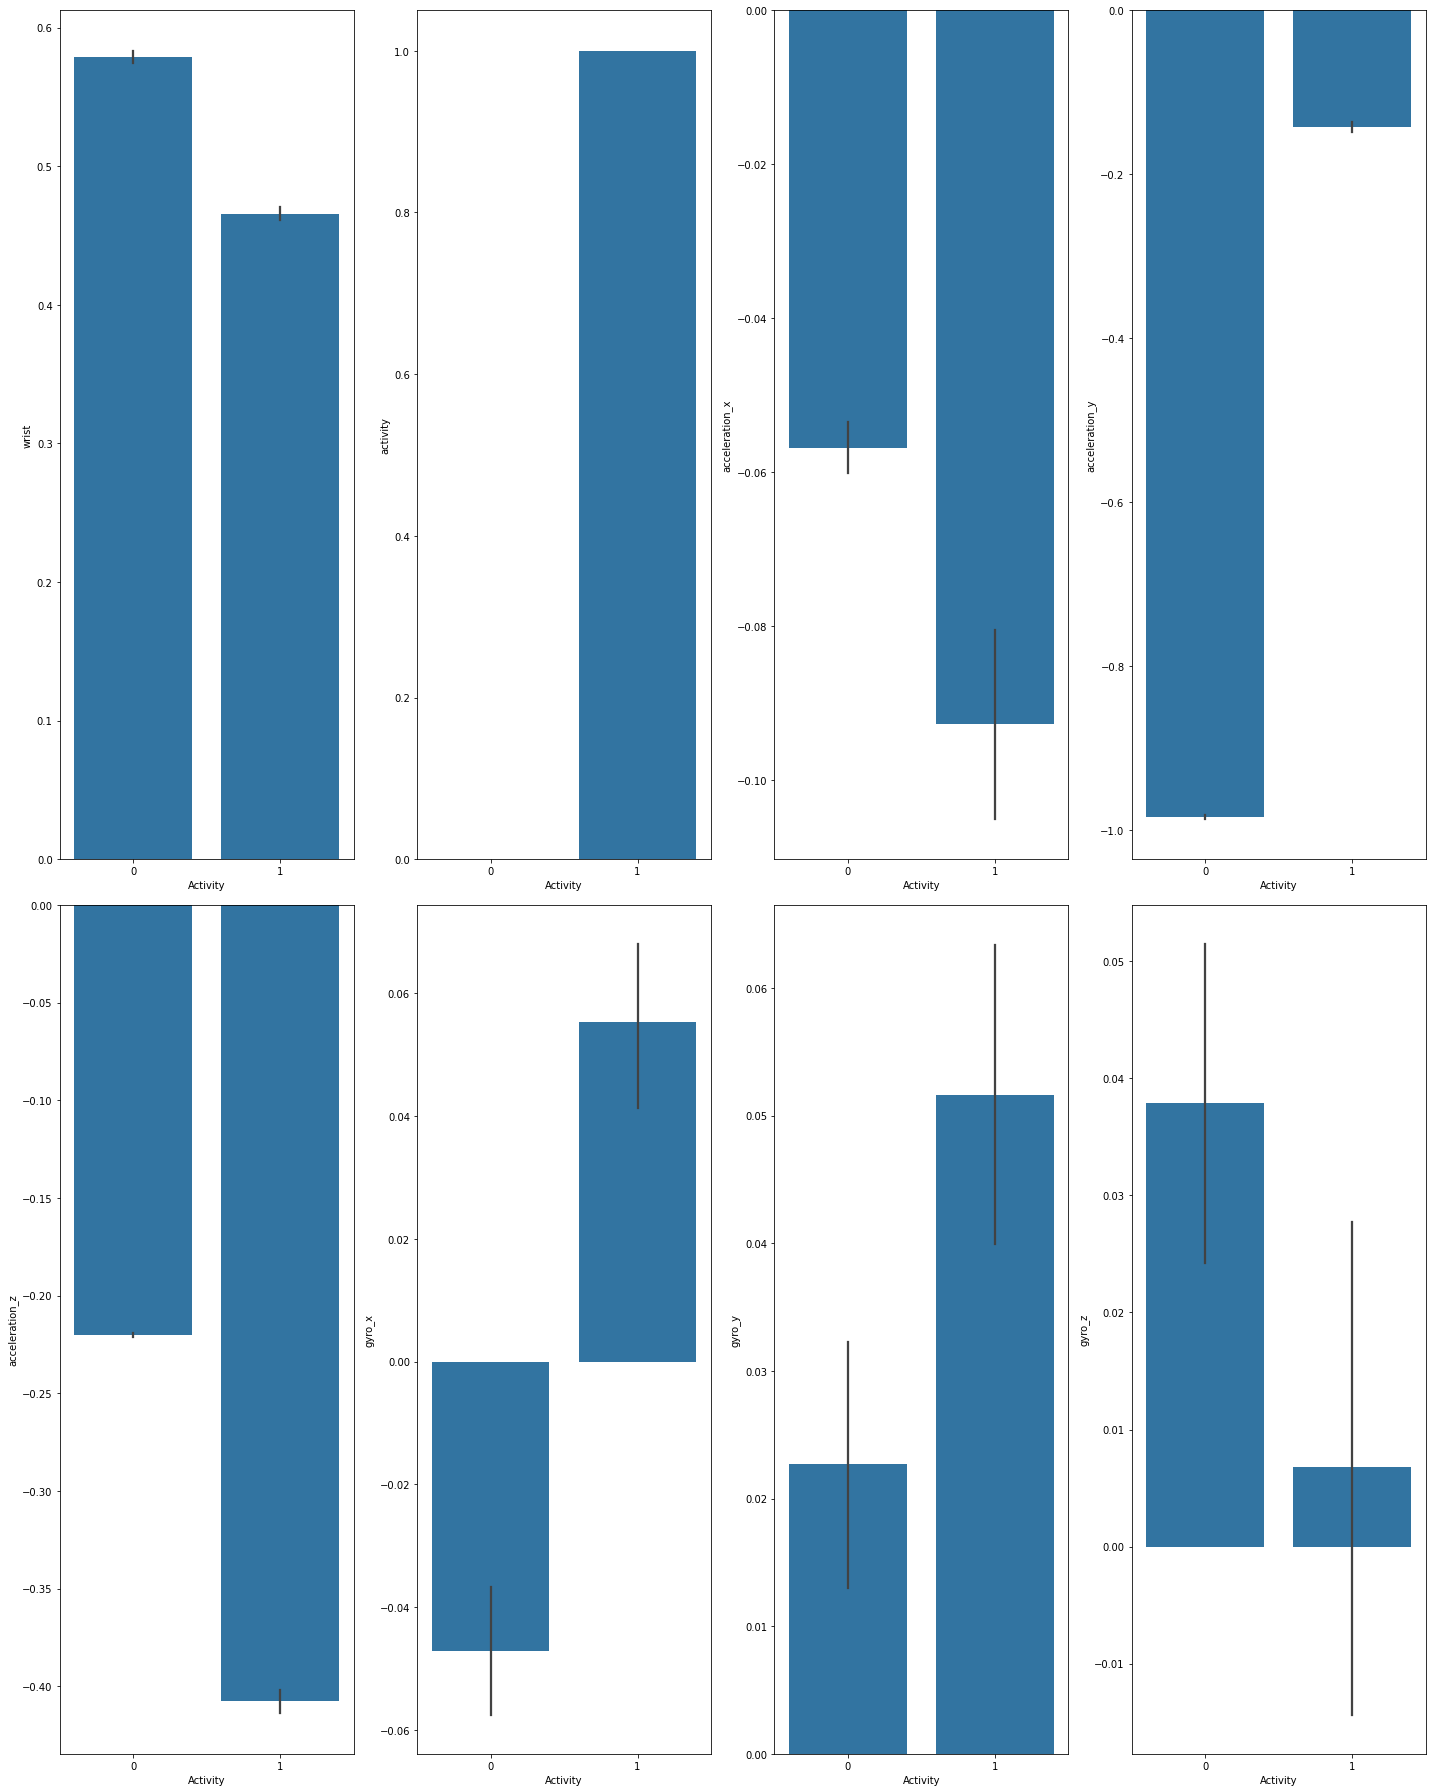

In [13]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 8:
        ax = plt.subplot(2,4, plotnumber)
        sns.barplot(x='activity',y=column,data=data)  # Use x=data[column] to specify the column for boxplot
        plt.xlabel('Activity')
        plt.ylabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

### 4)Outlier handling

In [ ]:
# Plotting boxplots for remaining columns
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber <=8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Count', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats  # Make sure to import the necessary libraries

col = 1
for c in data:  # Assuming df1 is your DataFrame
    if col <12:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Double-check if outliers are replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

In [ ]:
# Plotting boxplots for remaining columns
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber <=8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Count', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Classifying activities into walk and run:
0:'walk'
1:'run'

In [ ]:
print('Data contains ' + str(pd.value_counts(data['activity'].values)[0]) + '"walk" data samples as well as ' + str(pd.value_counts(data['activity'].values)[1])+ '"run" data samples')

# Classifying wrist into left and right:
0: "left"
1: "right"

In [ ]:
print('The data contains ' + str(pd.value_counts(data['wrist'].values)[0]) + 
      ' data samples collected on the left wrist as well as ' + str(pd.value_counts(data['wrist'].values)[1]) + 
      ' data samples collected on the right wrist')

In [ ]:
df =data.copy()

In [ ]:
Features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

In [ ]:
for c in Features:
    plt.figure(figsize=(10,5))
    plt.title("Data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

# correlation plot

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

# split the data into x and y

In [ ]:
x =data.drop(['wrist','activity'],axis=1)
y=data[['activity']]

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
x

In [ ]:
y.value_counts()

# train test split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 
x_train.shape, x_test.shape,y_train.shape, y_test.shape

In [ ]:
def evaluate_model(true, predicted):
    # Compute evaluation metrics
    confusion_mat = confusion_matrix(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    class_report = classification_report(true, predicted)
    f1 = f1_score(true, predicted)

    return confusion_mat, accuracy, precision, class_report, f1

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models ={
    "LogisticRegression": LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'XGBClassifier': XGBClassifier(),
    'MLPClassifier': MLPClassifier()
    
    
}

model_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset   confusion_mat, accuracy, precision, class_report, f1
    model_train_confusion_mat, model_train_accuracy, model_train_precision, model_train_class_report, model_train_f1 = evaluate_model(y_train, y_train_pred)

    model_test_confusion_mat, model_test_accuracy, model_test_precision, model_test_class_report, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- confusion_matrix:\n", model_train_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_train_accuracy))
    print("- precision_score: {:.4f}".format(model_train_precision))
    print("- classification_report:\n", model_train_class_report)
    print("- f1_score: {:.4f}".format(model_train_f1))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- confusion_matrix:\n", model_test_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_test_accuracy))
    print("- precision_score: {:.4f}".format(model_test_precision))
    print("- classification_report:\n", model_test_class_report)
    print("- f1_score: {:.4f}".format(model_test_f1))

    f1_list.append(model_test_f1)

    print('='*35)
    print('\n')

In [ ]:
df.columns

In [ ]:
print(x_test)

In [ ]:
# Assuming the columns in df are relevant features for your model
relevant_features = [ 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

new_data = df[relevant_features][:1]
predictions = model.predict(new_data)
print(predictions)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(input_shape=(x_train.shape[1:])),  # Assumes X_train is already flattened
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes, adjust as needed
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluation
_, accuracy = model.evaluate(x_test, y_test)
print("\nNeural Network:")
print(f"Accuracy: {accuracy:.4f}")
